## CPE 4903 - Cats and Dogs ##

## HW Part I - Import data ##
Produce the labeled data matrices X and Y by reading all 25000 images in the "train" folder. 
* You can download the photos folders from Kaggle: https://www.kaggle.com/c/dogs-vs-cats. 
* Download train.zip and unzip the 25000 files and move them to a folder and note the file path. For example, mine was
  C:\Users\haiho\Dropbox\_Professor\ECE\_fall 2020\CPE4903\Animals\train 
* You can use the functions provided in this notebook
* hint: You can use following loop command to loop through all the files: "for i,image_file in enumerate(images) :"
* Use train_test_split (with randomization) to split the data between train and test at 80/20. Be vigilant and verify the dimensions of X,Y throughout
* Display the resulting data matrices that should look like the following:
    - Shape of X_train is: (12288, 20000)
    - Shape of X_test is: (12288, 5000)
    - Shape of Y_train is: (1, 20000)
    - Shape of Y_test is: (1, 5000)
* Display the first 5 values of X_train and Y_train

In [1]:
import os, cv2, itertools # cv2 -- OpenCV
import numpy as np 
import pandas as pd 
import time
import sys

import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
#Make sure do not have words "cat" or "dog" in path name
TRAIN_DIR = r'/Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/train'  
ROWS = 64
COLS = 64
CHANNELS = 3

In [3]:
os.listdir(TRAIN_DIR)[0:5]

['dog.8011.jpg',
 'cat.5077.jpg',
 'dog.7322.jpg',
 'cat.2718.jpg',
 'cat.10151.jpg']

In [4]:
train_images = [TRAIN_DIR+'//'+i for i in os.listdir(TRAIN_DIR)]
train_images[0:2]

['/Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/train//dog.8011.jpg',
 '/Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/train//cat.5077.jpg']

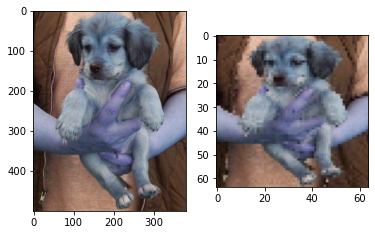

i =  0
/Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/train//dog.8011.jpg
Shape of resized image is (64, 64, 3)


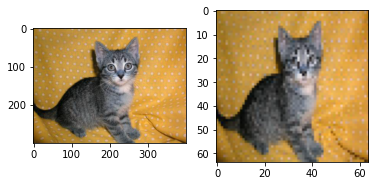

i =  1
/Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/train//cat.5077.jpg
Shape of resized image is (64, 64, 3)


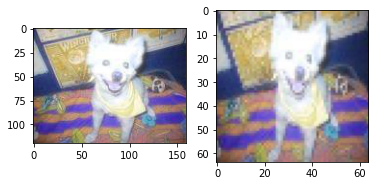

i =  2
/Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/train//dog.7322.jpg
Shape of resized image is (64, 64, 3)


In [5]:
for i,image_file in enumerate(train_images) :
    img = cv2.imread(image_file, cv2.IMREAD_COLOR)
    img_resized = cv2.resize(img, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img)
    ax2.imshow(img_resized)
    plt.show()
    print('i = ', i)
    print(image_file)
    print('Shape of resized image is {}'. format(img_resized.shape))
    time.sleep(2)
    if i==2:
        break

In [6]:
img_resized.shape

(64, 64, 3)

In [7]:
# falttens matrix to vector rank 0 type
x = np.squeeze(img_resized.reshape((ROWS*COLS*CHANNELS,1)))
x.shape

(12288,)

In [8]:
print(image_file)
if 'cat' in image_file.lower() :
    print('cat, output = 1')
else:
    print('dog, output = 0')



/Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/train//dog.7322.jpg
dog, output = 0


In [9]:
'dog' in image_file.lower()

True

### Definitions ###

In [10]:
#def cat_dog(file_path):
#    if 'cat' in image_file.lower() :
#        return 1
#   elif 'dog' in image_file.lower():
#        return 0
#    else :
#        print('ERROR')

In [11]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)

In [12]:
def data_prep(images): 
    m = len(images)
    nx = ROWS*COLS*CHANNELS

    X = np.ndarray((nx,m), dtype = np.uint8)
    Y = np.zeros((1,m))
   
    for i, image_file in enumerate(images) :
        image = read_image(image_file)
        X[:,i] = np.squeeze(image.reshape((nx,1)))
        if 'cat' in image_file.lower() :
            Y[0,i] = 1
        elif 'dog' in image_file.lower():
            Y[0,i] = 0
        else :
            print('ERROR')
        

        if i%1000 == 0 :
            print("Iteration {} of {}".format(i,m))
            
    return X,Y

In [13]:
def sigmoid(z):
    a = 1 / (1 + np.exp(-z))
    return a

In [14]:
# Your Part I code here. Print the shapes of all X's and Y's
train_images = [TRAIN_DIR+'/'+i for i in os.listdir(TRAIN_DIR)]
train_images[24999]

'/Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/train/cat.10148.jpg'

In [15]:
len(train_images)

25000

In [16]:
X,Y = data_prep(train_images)

Iteration 0 of 25000
Iteration 1000 of 25000
Iteration 2000 of 25000
Iteration 3000 of 25000
Iteration 4000 of 25000
Iteration 5000 of 25000
Iteration 6000 of 25000
Iteration 7000 of 25000
Iteration 8000 of 25000
Iteration 9000 of 25000
Iteration 10000 of 25000
Iteration 11000 of 25000
Iteration 12000 of 25000
Iteration 13000 of 25000
Iteration 14000 of 25000
Iteration 15000 of 25000
Iteration 16000 of 25000
Iteration 17000 of 25000
Iteration 18000 of 25000
Iteration 19000 of 25000
Iteration 20000 of 25000
Iteration 21000 of 25000
Iteration 22000 of 25000
Iteration 23000 of 25000
Iteration 24000 of 25000


In [41]:
X = np.array(X.T)
Y = np.array(Y.T)

In [42]:
print("The shape of X_train is {}".format(X.shape))
print("The shape of Y_train is {}".format(Y.shape))

The shape of X_train is (25000, 12288)
The shape of Y_train is (25000, 1)


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [44]:
np.sum(Y_train==1)

10004

In [46]:
np.savez('train', X = X_train, Y = Y_train)
np.savez('test', X = X_test, Y = Y_test)

## HW Part II - Manual Binary Classification Algorithm ##
Use the equations below, which was implemented in your previous assignment of classifying the unit circle to implement the cat/dog classification using the data generated in part I. 
<div>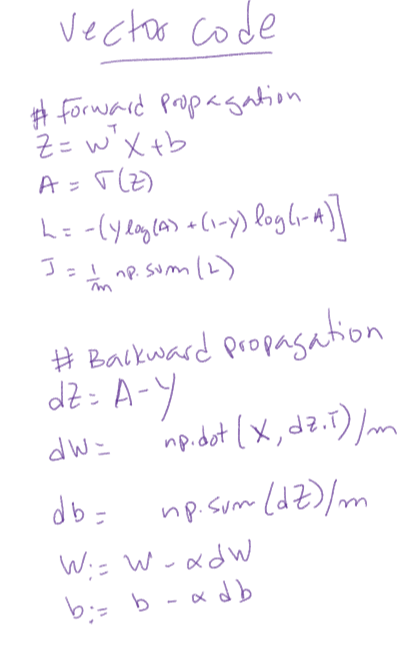<div>
    
Your successful run of the LoR algorithm on the images should show a converging cost function similar to shown below:
<div>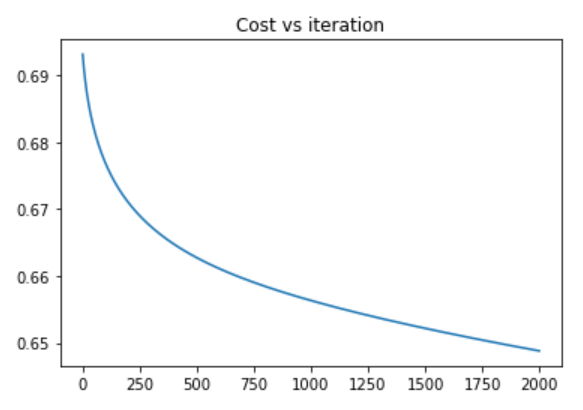<div>

Your train and test accuracy should be in the low 60%'s
* Plot your cost function
* Calculate and print your train and test accuracy (used command from previous assignment - circle)
* Show results of classifying a new downloaded image of cat or dog (maybe correct or incorrect, try several)


In [79]:
train_set = np.load('train.npz')
test_set = np.load('test.npz')
X_train = train_set['X']
Y_train = train_set['Y']
X_test = test_set['X']
Y_test = test_set['Y']

In [80]:
print("The shape of X_train is {}".format(X_train.shape))
print("The shape of Y_train is {}".format(Y_train.shape))

The shape of X_train is (20000, 12288)
The shape of Y_train is (20000, 1)


In [81]:
X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

In [82]:
epoch = 2000
alpha = 0.003

nx = X_train.shape[0]
m_train = X_train.shape[1]
W = np.zeros((nx,1))
b = 0
L = np.zeros((1,m_train))
X_train = X_train/255

In [83]:
m_train

20000

### Binary Classifier ###

In [84]:
m = m_train
X = X_train
Y = Y_train
J = np.zeros((epoch,1))

for i in range(epoch):
    # forward propagation
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)
    #L = -(Y_train * np.log(A) + (1 - Y_train) * np.log(1-A))
    #J[i] = (np.sum(L))/m_train
    J[i] = (-1/m)*(np.sum(np.multiply(Y,np.log(A)) + np.multiply((1-Y),np.log(1-A))))
    
    dZ = A - Y_train
    dW = np.dot(X_train, dZ.T)/m_train
    db = np.sum(dZ)/m_train
    W = W - alpha*dW
    b = b - alpha*db
    
    if i%100 == 0:
        print('Index: ', i)
        print('Cost = ', J[i])


Index:  0
Cost =  [0.69314718]
Index:  100
Cost =  [0.67327206]
Index:  200
Cost =  [0.66710324]
Index:  300
Cost =  [0.66339507]
Index:  400
Cost =  [0.66075137]
Index:  500
Cost =  [0.65867905]
Index:  600
Cost =  [0.65694844]
Index:  700
Cost =  [0.65543854]
Index:  800
Cost =  [0.65408067]
Index:  900
Cost =  [0.65283358]
Index:  1000
Cost =  [0.6516714]
Index:  1100
Cost =  [0.65057716]
Index:  1200
Cost =  [0.64953935]
Index:  1300
Cost =  [0.64854981]
Index:  1400
Cost =  [0.64760254]
Index:  1500
Cost =  [0.64669298]
Index:  1600
Cost =  [0.64581753]
Index:  1700
Cost =  [0.64497325]
Index:  1800
Cost =  [0.64415772]
Index:  1900
Cost =  [0.64336883]


The train accuracy is: 63.065000000000005 %


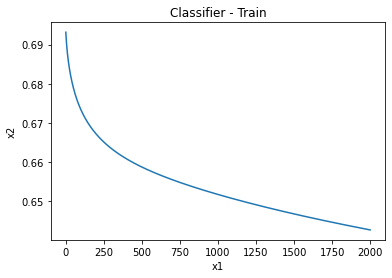

In [85]:
plt.plot(J);
plt.ylabel('x2')
plt.xlabel('x1')
plt.title('Classifier - Train');
acc = np.mean(np.rint(A) == Y_train)*100
print('The train accuracy is:',acc,'%')

In [86]:
X_test = X_test/255

In [87]:
m = m_test
X = X_test
Y = Y_test

Z = np.dot(W.T, X) + b
A = sigmoid(Z)
acc = np.mean(np.rint(A) == Y_test)*100
print('The test accuracy is:',acc,'%')

The test accuracy is: 60.440000000000005 %


array([[-0.00706151],
       [-0.00753984],
       [-0.00097157],
       ...,
       [-0.00388412],
       [-0.01420659],
       [-0.00456046]])

File path /Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/train/cat.10148.jpg
Prediction: CAT with probability [[54.56704149]]%


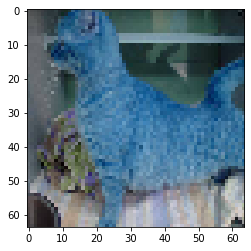

In [93]:
# After successsful learn, with the parameters W and b, download any image of cat or dog and test your classifier using code below:
file = train_images[24999]
print('File path',train_images[24999])
test_image = read_image(file)
X_img = test_image.reshape(1, ROWS*COLS*CHANNELS).T/255
Z = np.dot(W.T, X_img) + b
A = sigmoid(Z)
if A>.5:
    print('Prediction: CAT with probability {}%'. format(A*100))
else:
    print('Prediction: DOG with probability {}%'. format(100-A*100))
plt.imshow(test_image);

File path /Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/train/cat.11297.jpg
Prediction: CAT with probability [[56.9803044]]%


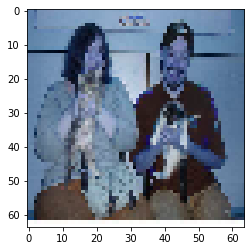

In [94]:
# After successsful learn, with the parameters W and b, download any image of cat or dog and test your classifier using code below:
file = train_images[22031]
print('File path',train_images[22031])
test_image = read_image(file)
X_img = test_image.reshape(1, ROWS*COLS*CHANNELS).T/255
Z = np.dot(W.T, X_img) + b
A = sigmoid(Z)
if A>.5:
    print('Prediction: CAT with probability {}%'. format(A*100))
else:
    print('Prediction: DOG with probability {}%'. format(100-A*100))
plt.imshow(test_image);

File path /Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/train/cat.6589.jpg
Prediction: DOG with probability [[52.1976171]]%


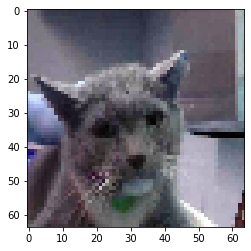

In [95]:
# After successsful learn, with the parameters W and b, download any image of cat or dog and test your classifier using code below:
file = train_images[20174]
print('File path',train_images[20174])
test_image = read_image(file)
X_img = test_image.reshape(1, ROWS*COLS*CHANNELS).T/255
Z = np.dot(W.T, X_img) + b
A = sigmoid(Z)
if A>.5:
    print('Prediction: CAT with probability {}%'. format(A*100))
else:
    print('Prediction: DOG with probability {}%'. format(100-A*100))
plt.imshow(test_image);

File path /Users/juwanenglish/CPE 4903 - NN/Cs_and_Ds/train/cat.1619.jpg
Prediction: CAT with probability [[64.35125989]]%


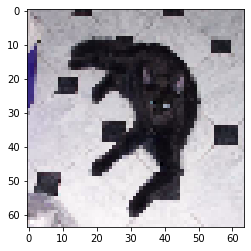

In [96]:
# After successsful learn, with the parameters W and b, download any image of cat or dog and test your classifier using code below:
file = train_images[23852]
print('File path',train_images[23852])
test_image = read_image(file)
X_img = test_image.reshape(1, ROWS*COLS*CHANNELS).T/255
Z = np.dot(W.T, X_img) + b
A = sigmoid(Z)
if A>.5:
    print('Prediction: CAT with probability {}%'. format(A*100))
else:
    print('Prediction: DOG with probability {}%'. format(100-A*100))
plt.imshow(test_image);